# STEP 1: Data Loading/Exploration

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/social_marketing.csv') # loading the data

print(data.head()) # displaying first few rows of dataset
print(data.info()) # checking for missing values and data types
print(data.describe()) # basic summary statistics for each category

  Unnamed: 0  chatter  current_events  travel  photo_sharing  uncategorized  \
0  hmjoe4g3k        2               0       2              2              2   
1  clk1m5w8s        3               3       2              1              1   
2  jcsovtak3        6               3       4              3              1   
3  3oeb4hiln        1               5       2              2              0   
4  fd75x1vgk        5               2       0              6              1   

   tv_film  sports_fandom  politics  food  ...  religion  beauty  parenting  \
0        1              1         0     4  ...         1       0          1   
1        1              4         1     2  ...         0       0          0   
2        5              0         2     1  ...         0       1          0   
3        1              0         1     0  ...         0       1          0   
4        0              0         2     0  ...         0       0          0   

   dating  school  personal_fitness  fashion  smal

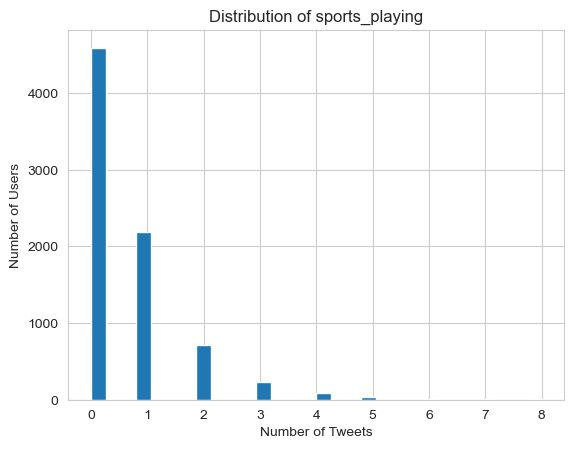

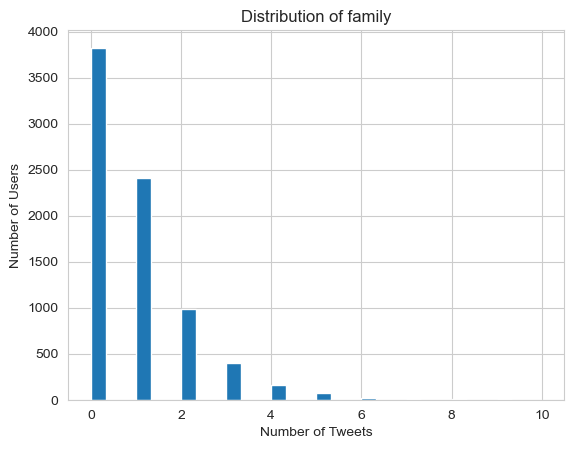

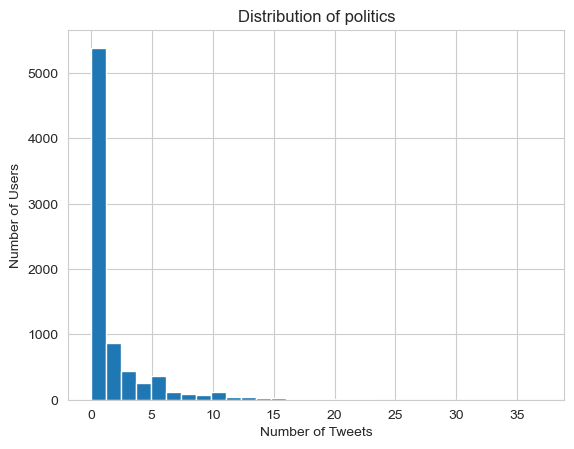

In [38]:
# visualizing distribution for a few categories
categories_to_plot = ['sports_playing','family','politics']

for category in categories_to_plot:
    plt.hist(data[category],bins=30)
    plt.title(f'Distribution of {category}')
    plt.xlabel('Number of Tweets')
    plt.ylabel('Number of Users')
    plt.show()

# STEP 2: Data Preprocessing

In [10]:
# outlier detection
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1

# defining bounds for outliers
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

# boolean dataframe for indicating if value is an outlier
outliers = ((data<lower_bound)|(data>upper_bound))

outliers_count = outliers.sum()
print('Number of Outliers per Column:')
print(outliers_count)

Number of Outliers per Column:
chatter              261
current_events       569
travel               399
photo_sharing        338
uncategorized        447
tv_film              945
sports_fandom        490
politics             730
food                 276
family               664
home_and_garden      143
music                420
news                1197
online_gaming        889
shopping             320
health_nutrition    1007
college_uni          627
sports_playing       382
cooking              841
eco                  189
computers            458
business             122
outdoors             650
crafts               238
automotive           695
art                  564
religion            1131
beauty               616
parenting            859
dating               510
school               644
personal_fitness     629
fashion              949
small_business        72
spam                  49
adult                570
dtype: int64


# STEP 3: Exploratory Data Analysis (EDA)

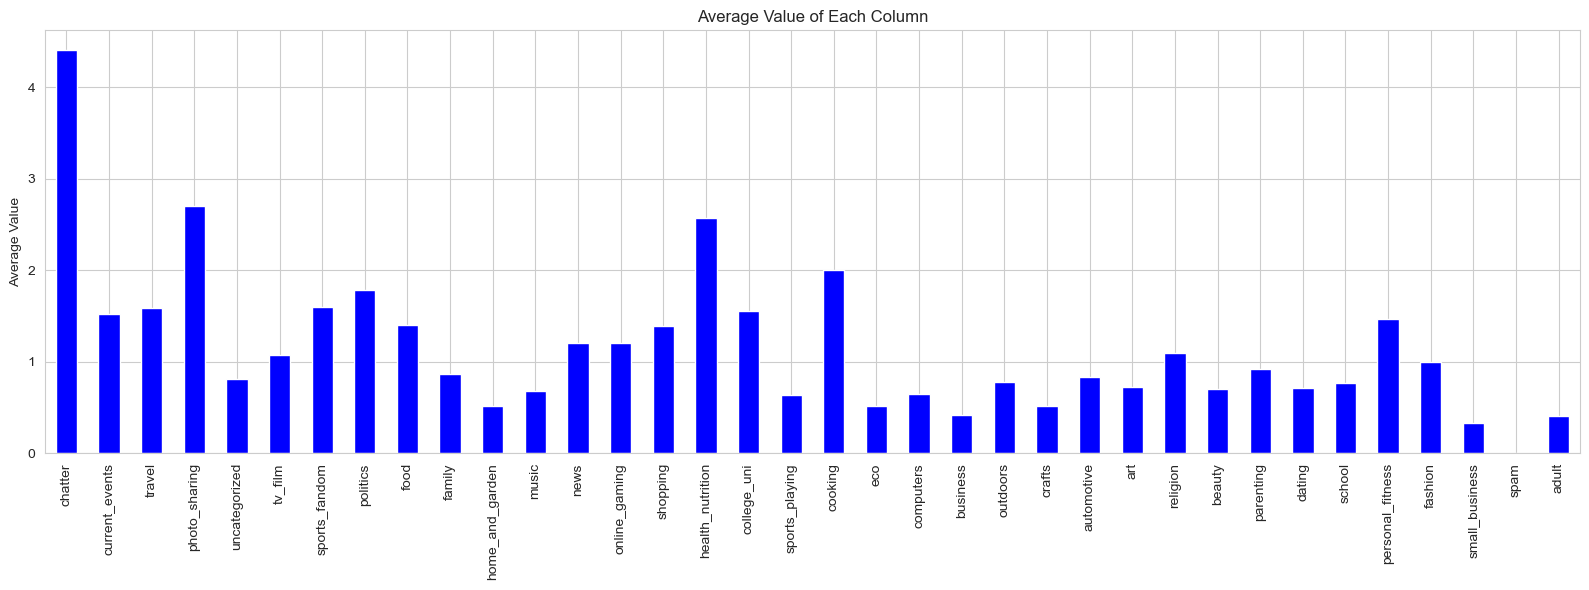

/var/folders/3_/l6nbtzjj2v5gcksnc4g__6nr0000gn/T/ipykernel_26449/401713341.py:14: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  outliers_counts = data.apply(lambda x:sum((x<(x.median()-1.5*x.mad()))|(x>(x.median()+1.5*x.mad()))))


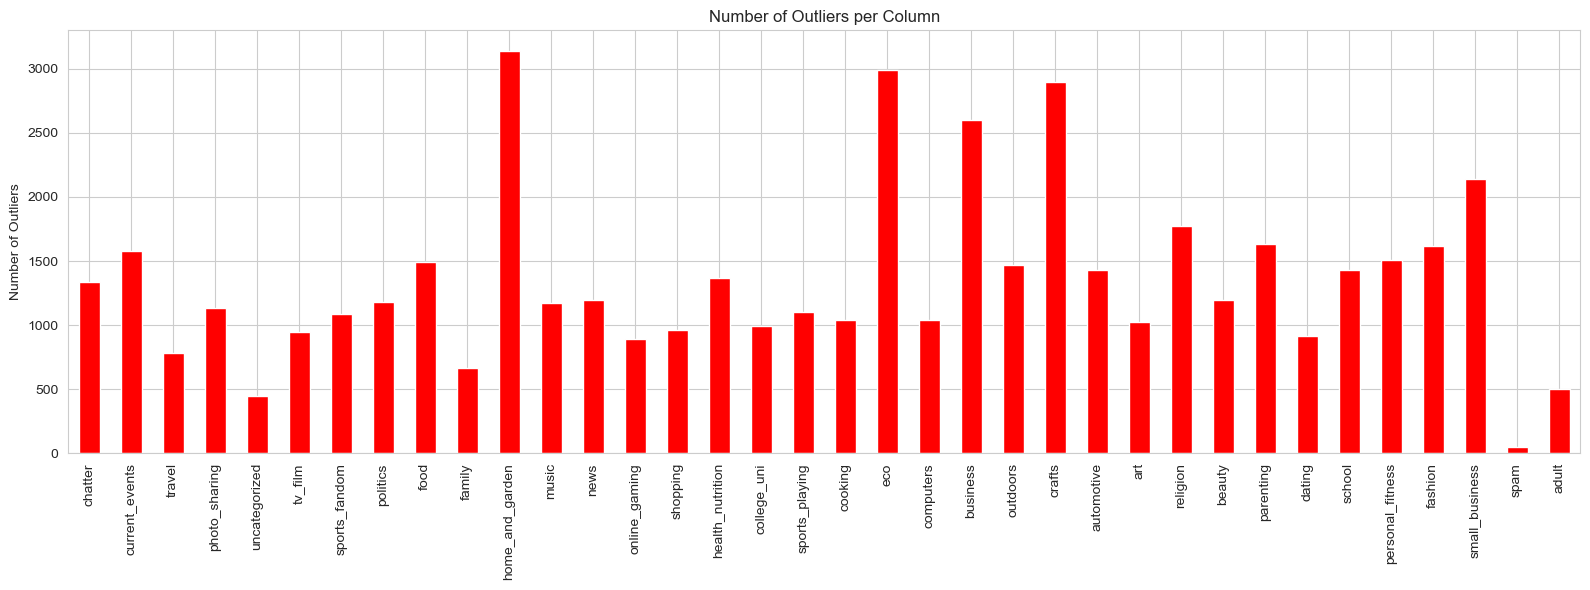

In [22]:
import seaborn as sns
sns.set_style('whitegrid')

# bar plot for average values of each column
plt.figure(figsize=(16,6))
data.mean().plot(kind='bar',color='blue')
plt.title('Average Value of Each Column')
plt.ylabel('Average Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# bar plot for number of outliers in each column
outliers_counts = data.apply(lambda x:sum((x<(x.median()-1.5*x.mad()))|(x>(x.median()+1.5*x.mad()))))
plt.figure(figsize=(16,6))
outliers_counts.plot(kind='bar',color='red')
plt.title('Number of Outliers per Column')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

DISTRIBUTION SPREAD: There's considerable variance in the mean values across different categories. For instance, while 'chatter' has an average value of around 4.4, indicating that this topic has a relatively high frequency or intensity of engagement, other categories like 'spam' and 'small_business' have much lower average values close to 0. This tells us that users generally engage more with general conversation ('chatter') and less with spam or small business topics.

OUTLIERS: The presence of outliers in almost every category suggests that there are specific users or posts that garner an unusually high level of engagement compared to the typical post in that category. For instance, the max engagement for 'politics' is 37, much higher than its 75th percentile value of 2, indicating a few posts or users that have extremely high engagement in this category.

ENGAGEMENT DISTRIBUTION: Some categories like 'news' and 'online_gaming' have 50% of their data (median) with engagement values of 0, which implies that half of the sampled users or posts in these categories don't receive any engagement. On the contrary, categories like 'chatter' have a median of 3, suggesting a more consistent user interaction.

POTENTIAL NICHES: Interestingly, some categories like 'health_nutrition' have relatively high average engagements (2.57) and also showcase significant outliers, which might suggest that while the average post gets a decent engagement, there are specific niche topics or influencers within this category that garner much higher attention.

# STEP 4: Market Segmentation

/Users/ayaankhan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/3_/l6nbtzjj2v5gcksnc4g__6nr0000gn/T/ipykernel_26449/1637779927.py:18: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  filtered_segment_summary = segment_summary[all_top_categories]


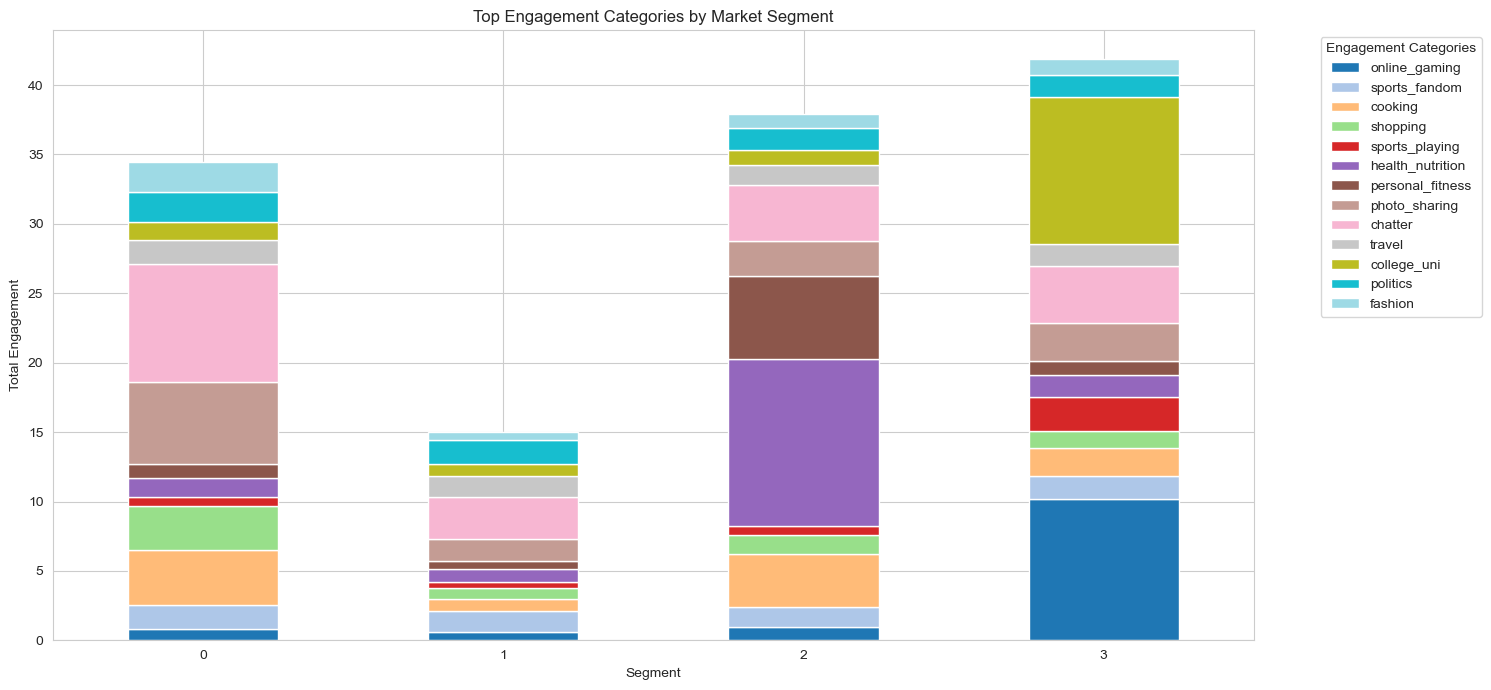

In [33]:
from sklearn.cluster import KMeans
import numpy as np

# removing non-numeric columns if any
numeric_df = data.select_dtypes(include=[np.number])

# using KMeans for clustering
kmeans = KMeans(n_clusters=4,random_state=0).fit(numeric_df)
data['Segment']=kmeans.labels_

# reviewing segmentation
segment_summary = data.groupby('Segment').mean()

# plotting stacked bar chart for top categories
N = 5
top_categories = segment_summary.apply(lambda x:x.nlargest(N).index.tolist(),axis=1)
all_top_categories = set([item for sublist in top_categories for item in sublist])
filtered_segment_summary = segment_summary[all_top_categories]
ax = filtered_segment_summary.plot(kind='bar',stacked=True,figsize=(15,7),cmap='tab20')
plt.title(f'Top Engagement Categories by Market Segment')
plt.xlabel('Segment')
plt.ylabel('Total Engagement')
plt.xticks(rotation=0)
plt.legend(title='Engagement Categories',bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()
plt.show()

For the segmentation analysis, we've categorized our audience into four distinct segments. Here's a summary of the identified segments based on their top engagement categories:

0: This segment displays a pronounced inclination towards ‘chatter’, accompanied by noteworthy engagement in categories like ‘photo sharing’ and ‘cooking’.

1: Members of this segment are primarily drawn to 'chatter', while also demonstrating interests in ‘politics’ and 'sports_fandom'. This group can be seen as generalists, engaging in a wide spectrum of topics without a distinct specialization.

2: The central interest for this group is ‘health nutrition’, complemented by substantial engagements in areas such as ‘personal fitness’, ‘cooking’, and ‘chatter’. This suggests individuals who prioritize their well-being and actively engage in health discussions, all while participating in broader conversations and culinary explorations.

3: This segment stands out due to its remarkable engagement in ‘college’ and ‘uni’. Additionally, they display considerable interactions in ‘online gaming’ and ‘chatter’.

Considering the brand 'NutrientH2O', segment 2 (emphasizing personal fitness and health) emerges as a crucial target audience.

# STEP 5: Final Insights

The dataset offers a detailed look into user engagement across various categories. Comprising of 7882 entries and 37 distinct columns, each entry appears to symbolize individual users/posts and their interactions across multiple features. The richness of this data offers numerous insights into user behavior and preferences.

On closer observation, we noticed substantial variability in engagement levels across these categories. Most notable, the 'chatter' column emerges as the leading point of interaction, signaling a user preference for more general or free-form discussions. In contrast, areas like 'spam' and 'small_business' secure the least engagement, indicating they might not resonate as strongly with the platform's user base. Interestingly, while the 'politics' category doesn't dominate in overall engagement, it does exhibit specific instances of exceptionally high activity, suggesting particular topics or events that spur significant user interaction. However, it's equally noteworthy that categories like 'news' and 'online_gaming' present with a median engagement score of 0, pointing towards either a lack of content or limited user interest in those areas.

By understanding the segments displayed earlier, NutrientH2O can tailor its marketing strategies to resonate with each audience better. It's crucial to remember that while these are broad segments, individuals within might have nuanced preferences; however, users placed in segment 2 did display a general interest in posts related to personal fitness and health, showing that this may be an area where the brand could turn the focus towards.